# About
Explore the symmetric Beta distribution PDF.

### Context
Supposing that probability `p` is itself stochastic. Then a beta distribution in the range [0, 1] can describe the pdf of `p`.

### Content
Sections:
0. Setup
1. Plots
2. Variance Calculations

Scenarios:
* Bernoulli (max variance)
* U-shaped
* Uniform (max entropy)
* n-shaped

# 0. Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import beta

### Helper Functions

In [2]:
def plot_beta(a, b):
    """Plot beta distribution with shape parameters a and b."""

    # -------------------------------------
    # Generate Points
    # Split evenly between 0 and 1
    x = np.linspace(0, 1000)/1000

    y = beta.pdf(x, a, b)

    # -------------------------------------
    # Plot
    fig, ax = plt.subplots(1, 1)

    ax.plot(x, y);

    plt.title(f'Beta PDF  \na={a}, b={b}')
    plt.show()

In [3]:
def get_beta_variance(a, b):
    """Calculate variance of a beta distribution with shape parameters a and b."""

    _, variance = beta.stats(a, b)
    variance = float(variance)

    return variance

# 1. Plots

### Uniform Distribution
* Flat
* Maximum Entropy

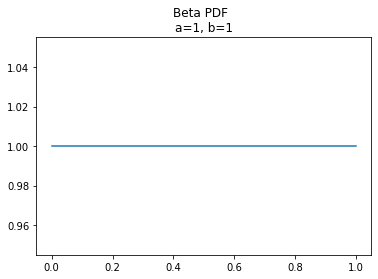

In [4]:
# Uniform Distribution
a=b=1

# Plot
plot_beta(a,b);

### Bernoulli Approximation
* Approaching Binary as shape tends to zero
* Maximum Variance

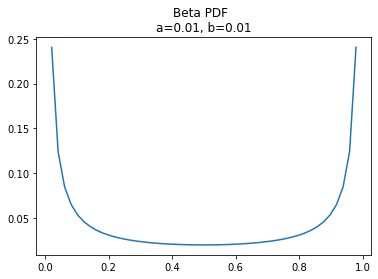

In [5]:
# Bernoulli Approximation 
# (small shape parameters)
a=b= 0.01

# Plot
plot_beta(a,b);

### U Shaped

shape < 1

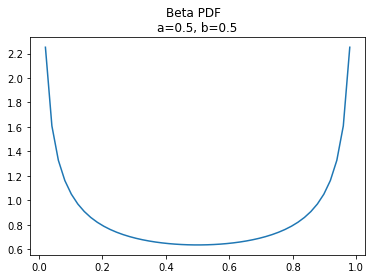

In [6]:
# U shaped
a=b=0.5

# Plot
plot_beta(a,b)

### n Shaped
shape > 1

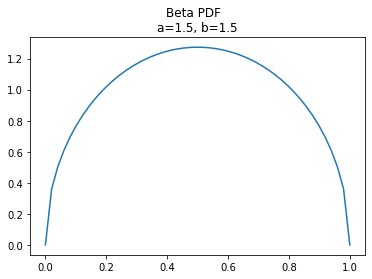

In [7]:
# U shaped
a=b=1.5

# Plot
plot_beta(a,b)

# 2. Variance

In [8]:
shape_data = {'bernoulli': 0.01,
              'u-shape': 0.5,
              'uniform': 1,
              'n-shape': 1.5}

In [9]:
df = pd.DataFrame(shape_data.values(), index=shape_data.keys(), columns=['shape'])
df

,shape
bernoulli,0.01
u-shape,0.50
uniform,1.00
n-shape,1.50


In [10]:
# Calculate Variance
df['variance'] = df.apply(lambda x: get_beta_variance(x['shape'], x['shape']), axis=1)
df.round(2)

,shape,variance
bernoulli,0.01,0.25
u-shape,0.50,0.12
uniform,1.00,0.08
n-shape,1.50,0.06


For context, the variance of a bernoulli with p=0.5 is p*(1-p) = 0.25.

As shape -> 0:
* Distribution -> bernoulli
* Variance -> 0.25.